In [1]:
# Importar Bibliotecas
import pandas as pd
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt

In [2]:
# Exportar CSV
df = pd.read_csv('2022_Viagem.csv',sep = ';', encoding= 'latin1')
df

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,...,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,17438343,000001/22,Realizada,NÃO,Sem informação,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.188.261-**,...,-1,Não Informado,12/02/2022,14/02/2022,Brasília/DF,Servidor designado em missão transitória na Em...,"0,00","0,00","0,00","0,00"
1,17503013,Informações pro,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Departamento de Polícia Federal,ID012100276,...,Sigilosa,Informações protegidas por sigilo,01/01/2022,24/04/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"20995,16","0,00","0,00","0,00"
2,17503072,Informações pro,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Departamento de Polícia Federal,ID006700175,...,Sigilosa,Informações protegidas por sigilo,01/01/2022,04/11/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"63045,68","0,00","0,00","0,00"
3,17503094,Informações pro,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Departamento de Polícia Federal,ID005400135,...,Sigilosa,Informações protegidas por sigilo,01/01/2022,08/09/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"49353,83","0,00","0,00","0,00"
4,17513261,Informações pro,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Departamento de Polícia Federal,ID214200100,...,Sigilosa,Informações protegidas por sigilo,01/01/2022,29/08/2022,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,"36225,93","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646769,2022000963,Sem informação,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.613.586-**,...,-1,Não Informado,14/12/2022,14/12/2022,Sem informação,Atividades de trabalho no Rio de Janeiro e Eve...,"233,37","3906,16","0,00","0,00"
646770,2022000974,Sem informação,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.321.949-**,...,-1,Não Informado,14/12/2022,15/12/2022,Sem informação,Participar como palestrante em evento do Insti...,"169,75","0,00","0,00","0,00"
646771,2022000982,Sem informação,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.244.227-**,...,-1,Não Informado,15/12/2022,30/12/2022,Sem informação,Cumprir agenda no Rio de Janeiro.,"0,00","1589,46","0,00","0,00"
646772,2022000985,Sem informação,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.025.997-**,...,-1,Não Informado,14/12/2022,14/12/2022,Sem informação,Participar de reunião com Dealers,"290,93","5893,66","0,00","0,00"


In [3]:
# Renomear a coluna 
df.rename(columns = {'Valor diárias': 'Valor Total'}, inplace = True)

In [4]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646774 entries, 0 to 646773
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  646774 non-null  int64 
 1   Número da Proposta (PCDP)            646774 non-null  object
 2   Situação                             646774 non-null  object
 3   Viagem Urgente                       646774 non-null  object
 4   Justificativa Urgência Viagem        646751 non-null  object
 5   Código do órgão superior             646774 non-null  int64 
 6   Nome do órgão superior               646774 non-null  object
 7   Código órgão solicitante             646774 non-null  int64 
 8   Nome órgão solicitante               646774 non-null  object
 9   CPF viajante                         646769 non-null  object
 10  Nome                                 646774 non-null  object
 11  Cargo                     

In [5]:
# Substituir a vírgula por pontos
df['Valor Total'] = df['Valor Total'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Valor passagens'] = df['Valor passagens'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Valor devolução'] = df['Valor devolução'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Valor outros gastos'] = df['Valor outros gastos'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [6]:
# Transformar as colunas com datas do tipo datetime
df['Período - Data de início'] = pd.to_datetime(df['Período - Data de início'])
df['Período - Data de fim'] = pd.to_datetime(df['Período - Data de fim'])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2022' in DD/MM/YYYY format. Provide format or specify in

In [7]:
# Formato das datas
df['Período - Data de início'] = pd.to_datetime(df['Período - Data de início'],format="%d/%m/%y")
df['Período - Data de fim'] = pd.to_datetime(df['Período - Data de fim'],format="%d/%m/%y")

In [8]:
# Deletar as colunas
del df['Justificativa Urgência Viagem']
del df['Código do órgão superior']
del df['Código órgão solicitante']
del df['CPF viajante']
del df['Motivo']
del df['Função']
del df['Descrição Função']
del df['Valor devolução']
del df['Valor outros gastos']

In [9]:
# Ver o dataframe
df.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Nome do órgão superior,Nome órgão solicitante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Valor Total,Valor passagens
0,17438343,000001/22,Realizada,NÃO,Ministério das Relações Exteriores,Ministério das Relações Exteriores - Unidades ...,RAIMUNDO NONATO DA SILVA COSTA,AGENTE DE VIGILANCIA,2022-12-02,2022-02-14,Brasília/DF,0.00,0.0
1,17503013,Informações pro,Realizada,NÃO,Ministério da Justiça e Segurança Pública,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,2022-01-01,2022-04-24,Informações protegidas por sigilo,20995.16,0.0
2,17503072,Informações pro,Realizada,NÃO,Ministério da Justiça e Segurança Pública,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,2022-01-01,2022-04-11,Informações protegidas por sigilo,63045.68,0.0
3,17503094,Informações pro,Realizada,NÃO,Ministério da Justiça e Segurança Pública,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,2022-01-01,2022-08-09,Informações protegidas por sigilo,49353.83,0.0
4,17513261,Informações pro,Realizada,NÃO,Ministério da Justiça e Segurança Pública,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,2022-01-01,2022-08-29,Informações protegidas por sigilo,36225.93,0.0


In [10]:
# Estatísticas
df[['Valor Total']].describe()

,Valor Total
count,646774.000000
mean,1515.475848
std,5109.919595
min,0.000000
25%,205.390000
50%,660.150000
75%,1249.950000
max,193396.270000


In [11]:
# Mediana
df[['Valor Total']].median()

Valor Total    660.15
dtype: float64

In [12]:
# Ver os valores mínimos
df[df['Valor Total'] == df['Valor Total'].min()]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Nome do órgão superior,Nome órgão solicitante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Valor Total,Valor passagens
0,17438343,000001/22,Realizada,NÃO,Ministério das Relações Exteriores,Ministério das Relações Exteriores - Unidades ...,RAIMUNDO NONATO DA SILVA COSTA,AGENTE DE VIGILANCIA,2022-12-02,2022-02-14,Brasília/DF,0.0,0.00
5,17513655,000001/22,Realizada,NÃO,Ministério da Educação,Fundação Universidade Federal do ABC,ARTUR ZIMERMAN,PROFESSOR DO MAGISTERIO SUPERIOR,2022-04-01,2022-12-16,Londres/Reino Unido,0.0,0.00
9,17569036,000002/22-3C,Realizada,SIM,Ministério das Relações Exteriores,Ministério das Relações Exteriores - Unidades ...,MARCIO EDWARD DE LIMA GONCALVES,OFICIAL DE CHANCELARIA,2022-06-03,2022-07-03,Brasília/DF,0.0,2801.39
10,17582605,000003/22,Realizada,NÃO,Ministério das Relações Exteriores,Ministério das Relações Exteriores - Unidades ...,CAROLINA MONTEIRO VILALVA LESSA,NaN,2022-06-17,2022-06-24,Sem informação,0.0,5106.38
11,17582617,000004/22,Realizada,NÃO,Ministério das Relações Exteriores,Ministério das Relações Exteriores - Unidades ...,FELIPE VILALVA LESSA,NaN,2022-06-17,2022-06-24,Sem informação,0.0,4213.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646741,2022000823,Sem informação,Realizada,NÃO,Banco Central do Brasil - Orçamento Fiscal e S...,Banco Central do Brasil - Orçamento Fiscal e S...,DIOGO ABRY GUILLEN,DIRETOR DO BANCO CENTRAL,2022-07-12,2022-12-14,Sem informação,0.0,921.26
646748,2022000865,Sem informação,Realizada,NÃO,Banco Central do Brasil - Orçamento Fiscal e S...,Banco Central do Brasil - Orçamento Fiscal e S...,PAULO SERGIO NEVES DE SOUZA,DIRETOR SERVIDOR DO BANCO CENTRAL,2022-08-12,2022-12-12,Sem informação,0.0,1116.29
646753,2022000883,Sem informação,Realizada,NÃO,Banco Central do Brasil - Orçamento Fiscal e S...,Banco Central do Brasil - Orçamento Fiscal e S...,PAULO SERGIO NEVES DE SOUZA,DIRETOR SERVIDOR DO BANCO CENTRAL,2022-11-11,2022-11-16,Sem informação,0.0,2949.29
646760,2022000953,Sem informação,Realizada,NÃO,Banco Central do Brasil - Orçamento Fiscal e S...,Banco Central do Brasil - Orçamento Fiscal e S...,PAULO SERGIO NEVES DE SOUZA,DIRETOR SERVIDOR DO BANCO CENTRAL,2022-12-15,2022-12-15,Sem informação,0.0,1982.46


In [13]:
# Valor Máximo
df[df['Valor Total'] == df['Valor Total'].max()]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Nome do órgão superior,Nome órgão solicitante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Valor Total,Valor passagens
4193,17807735,Informações pro,Realizada,NÃO,Ministério da Justiça e Segurança Pública,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,2022-01-01,2022-05-14,Informações protegidas por sigilo,193396.27,5525.16


In [14]:
# Valores NAs
faltantes_porcentual = (df.isnull().sum()/len(df['Identificador do processo de viagem']))*100
faltantes_porcentual

Identificador do processo de viagem     0.000000
Número da Proposta (PCDP)               0.000000
Situação                                0.000000
Viagem Urgente                          0.000000
Nome do órgão superior                  0.000000
Nome órgão solicitante                  0.000000
Nome                                    0.000000
Cargo                                  37.551448
Período - Data de início                0.000000
Período - Data de fim                   0.000000
Destinos                                0.000000
Valor Total                             0.000000
Valor passagens                         0.000000
dtype: float64

In [15]:
# Quantos valores NAs
df['Cargo'].isnull().sum()

242873

In [16]:
# Agrupar por órgão
agrupado = df.groupby(['Nome do órgão superior']).size()
agrupado

Nome do órgão superior
Advocacia-Geral da União                                            3253
Banco Central do Brasil - Orçamento Fiscal e Seguridade Social       620
Controladoria-Geral da União                                        2224
MIN.DA GEST.E DA INOVACAO EM SERVICOS PUBLICO                        206
MINISTERIO DO PLANEJAMENTO E ORCAMENTO                             35178
MINISTERIO DOS POVOS INDIGENAS                                      7677
Ministério da Agricultura, Pecuária e Abastecimento                27267
Ministério da Ciência, Tecnologia, Inovações e Comunicações         3922
Ministério da Cultura                                               1559
Ministério da Defesa                                              128214
Ministério da Economia                                               303
Ministério da Educação                                            114206
Ministério da Indústria, Comércio Exterior e Serviços               1975
Ministério da Infraestrutura

In [17]:
# Substituir os NAs 
df['Cargo'].fillna('Nao informado', inplace = True)

In [18]:
# Verificando
faltantes_porcentual = (df.isnull().sum()/len(df['Identificador do processo de viagem']))*100
faltantes_porcentual

Identificador do processo de viagem    0.0
Número da Proposta (PCDP)              0.0
Situação                               0.0
Viagem Urgente                         0.0
Nome do órgão superior                 0.0
Nome órgão solicitante                 0.0
Nome                                   0.0
Cargo                                  0.0
Período - Data de início               0.0
Período - Data de fim                  0.0
Destinos                               0.0
Valor Total                            0.0
Valor passagens                        0.0
dtype: float64

In [23]:
# Agrupar os valores totais por órgão superior
agrupado = df.groupby(['Nome do órgão superior'])['Valor Total'].sum().sort_values().head(3)
agrupado

Nome do órgão superior
Ministério do Trabalho                                  119621.12
MIN.DA GEST.E DA INOVACAO EM SERVICOS PUBLICO           126041.12
Ministério do Planejamento, Desenvolvimento e Gestão    360497.06
Name: Valor Total, dtype: float64

In [29]:
# 5 maiores
agrupado = df.groupby(['Nome do órgão superior'])['Valor Total'].sum().sort_values().tail(5)
agrupado

Nome do órgão superior
Ministério da Saúde                          3.278297e+07
Ministério do Meio Ambiente                  3.869186e+07
Ministério da Educação                       8.767803e+07
Ministério da Defesa                         1.051084e+08
Ministério da Justiça e Segurança Pública    1.742774e+08
Name: Valor Total, dtype: float64

In [30]:
# Dividir por mil os valores
agrupado/1000

Nome do órgão superior
Ministério da Saúde                           32782.96970
Ministério do Meio Ambiente                   38691.86288
Ministério da Educação                        87678.03411
Ministério da Defesa                         105108.43943
Ministério da Justiça e Segurança Pública    174277.37465
Name: Valor Total, dtype: float64

([<matplotlib.axis.YTick at 0x1fe8795e670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

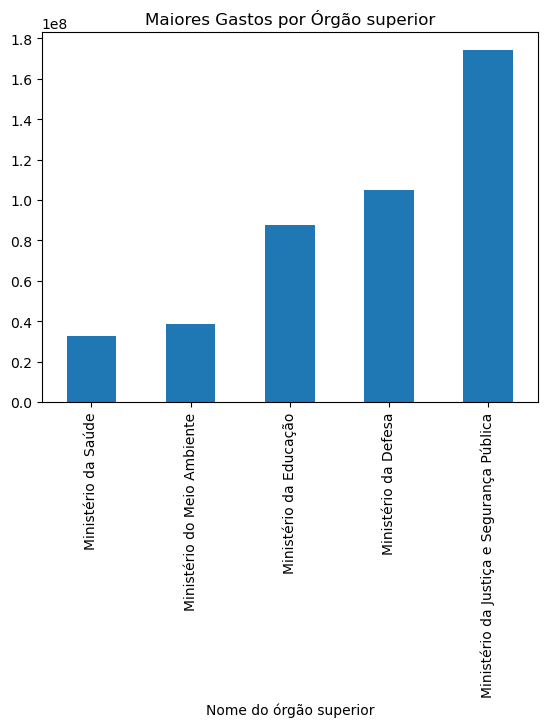

In [31]:
# Gráfico
agrupado.plot.bar(sns.color_palette()).set(title='Maiores Gastos por Órgão superior')
plt.yticks(range(0, 200000000,20000000))

In [32]:
# Deletar linhas
indexNames = df[ df['Nome do órgão superior'] == 'Sem informação' ].index
df.drop(indexNames , inplace=True)

In [33]:
# Deletar linhas
indexNames = df[ df['Nome'] == 'Informações protegidas por sigilo' ].index
df.drop(indexNames , inplace=True)

# Servidores que mais gastaram
group_senador_valorReembolsado = df[['Nome do órgão superior','Nome','Cargo','Valor passagens']].groupby(['Nome do órgão superior','Nome','Cargo']).sum(['Valor passagens']).sort_values(by='Valor passagens',ascending=False)
group_senador_valorReembolsado.head(5)

Valor passagens
Nome do órgão superior             Nome                                   Cargo                                       
Ministério das Relações Exteriores SARQUIS JOSE BUAINAIN SARQUIS          MINISTRO DE PRIMEIRA CLASSE        470412.91
                                   CARLOS ALBERTO FRANCO FRANCA           MINISTRO DE PRIMEIRA CLASSE        433525.35
Ministério do Meio Ambiente        JOAQUIM ALVARO PEREIRA LEITE           Nao informado                      432547.47
Ministério da Saúde                MARCELO ANTONIO CARTAXO QUEIROGA LOPES Nao informado                      405764.07
Ministério das Relações Exteriores KENNETH FELIX HACZYNSKI DA NOBREGA     MINISTRO DE PRIMEIRA CLASSE        385243.23

In [46]:
# Agrupar pela situação da viagem
agrupado = df.groupby(['Situação']).size().sort_values()
agrupado

Situação
Não realizada     11813
Realizada        447871
dtype: int64

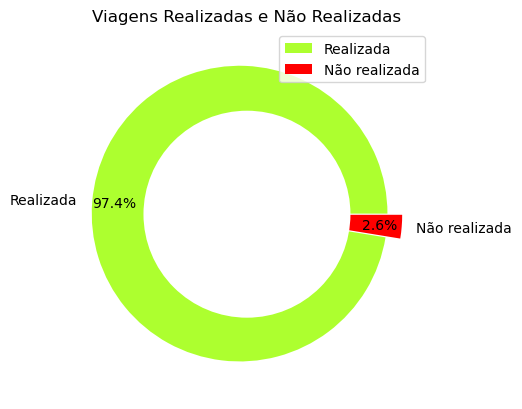

In [49]:
# Gráfico de pizza
sizes = [447871,  11813] # Pegar os valores
  
# Eixos
labels = ['Realizada', 'Não realizada']
  
# Cores
colors = ['#ADFF2F', '#FF0000']
  
explode = (0.05, 0.05)
  
# Gerar gráfico de pizza
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  

fig.gca().add_artist(centre_circle)
  
# Título
plt.title('Viagens Realizadas e Não Realizadas')
  
# Legenda
plt.legend(labels, loc="upper right")
plt.show()